## Customer Segmentation using K-Means Algorithm 

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis 

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

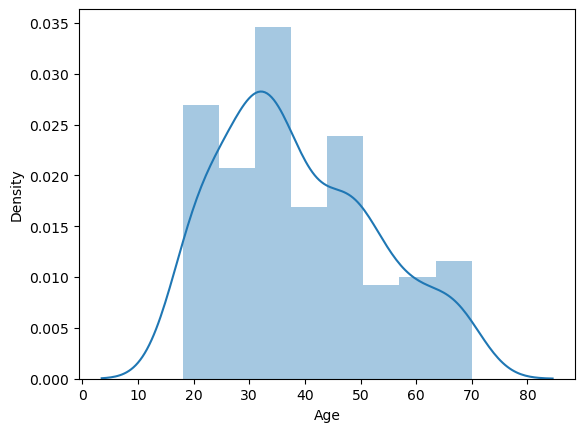

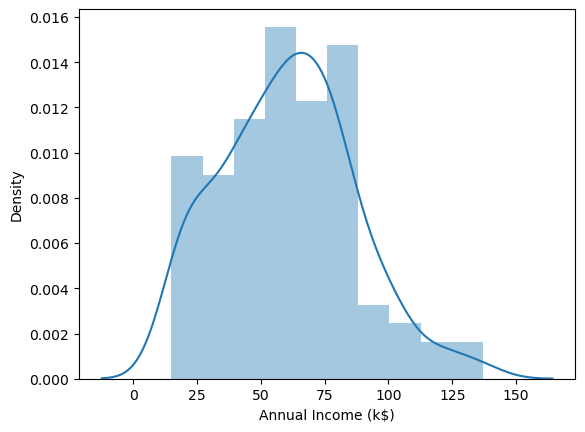

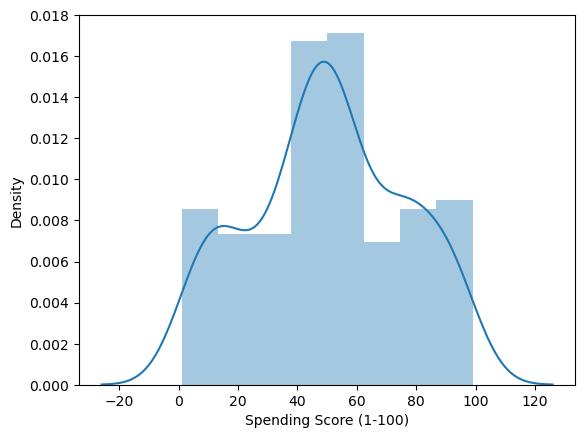

In [10]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

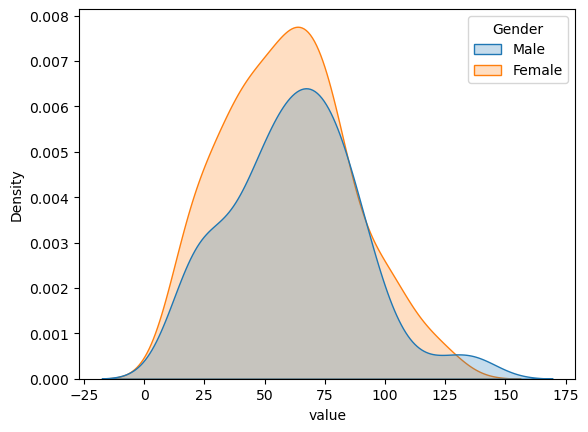

In [14]:
melted_df = df.melt(id_vars='Gender', value_vars=['Annual Income (k$)'])
sns.kdeplot(data=melted_df, x='value', hue='Gender', shade=True);

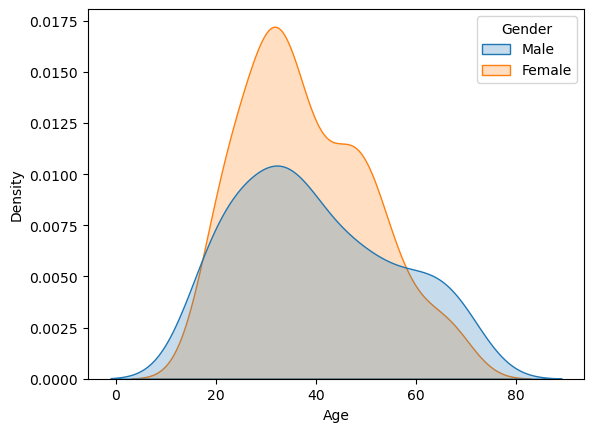

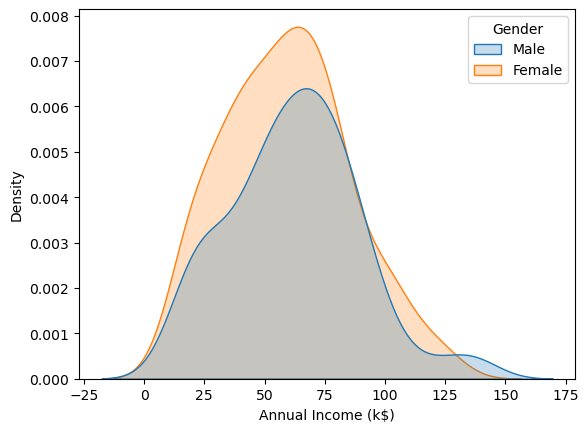

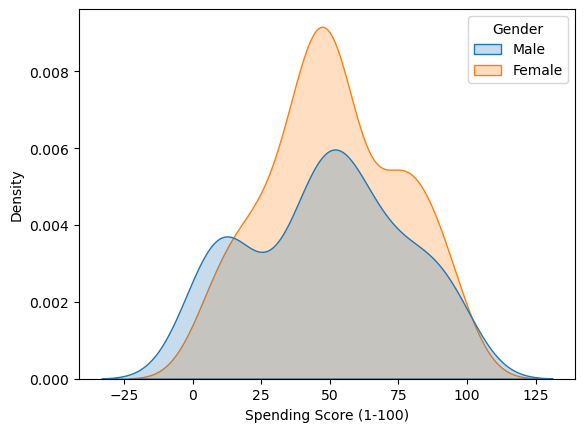

In [180]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=melted_df, x=df[i], hue='Gender', shade=True);

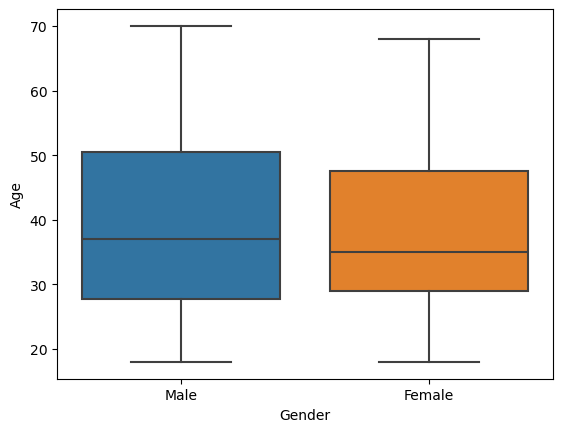

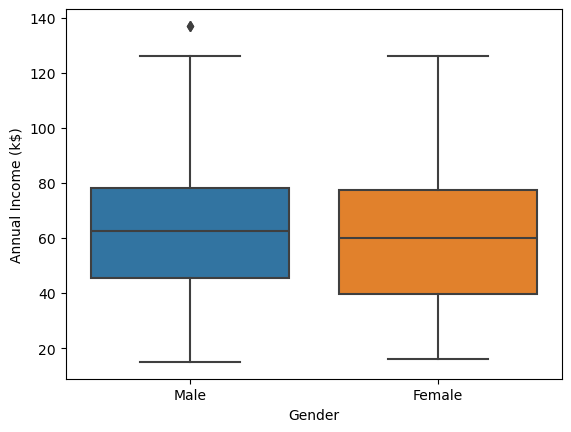

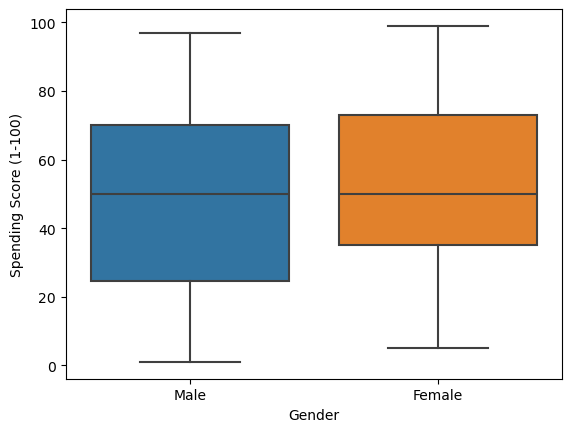

In [21]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [27]:
df['Gender'].value_counts(normalize=True) #gives percentage of M,F population

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis 

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

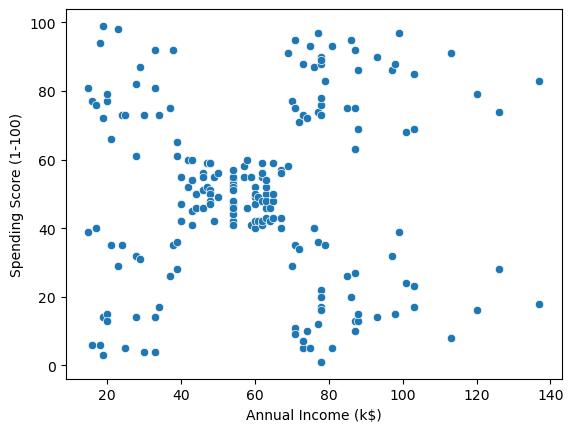

In [29]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

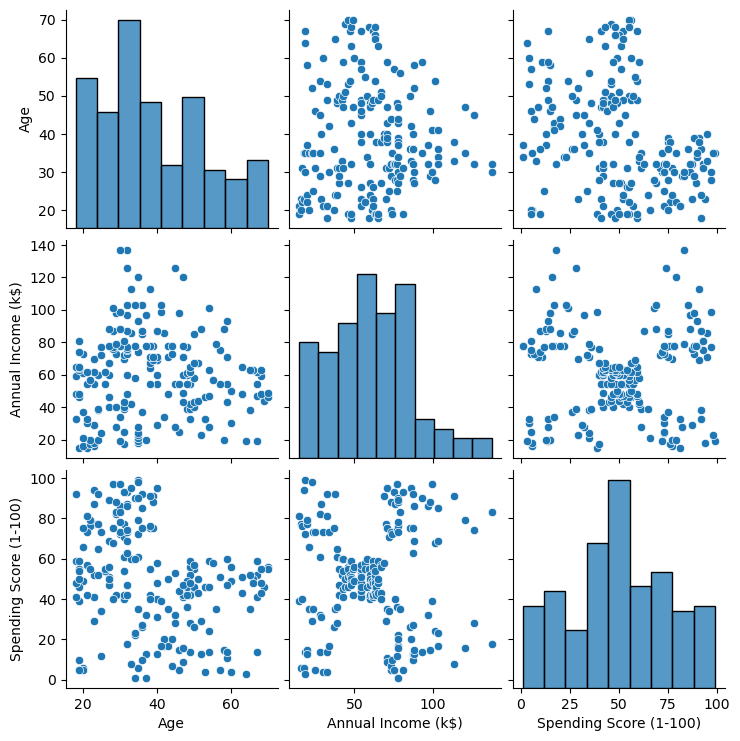

In [31]:
df=df.drop('CustomerID',axis=1) #since its constant and does not add any value to our analysis [axis = 1 is cols and axis=0 is rows]
sns.pairplot(df)

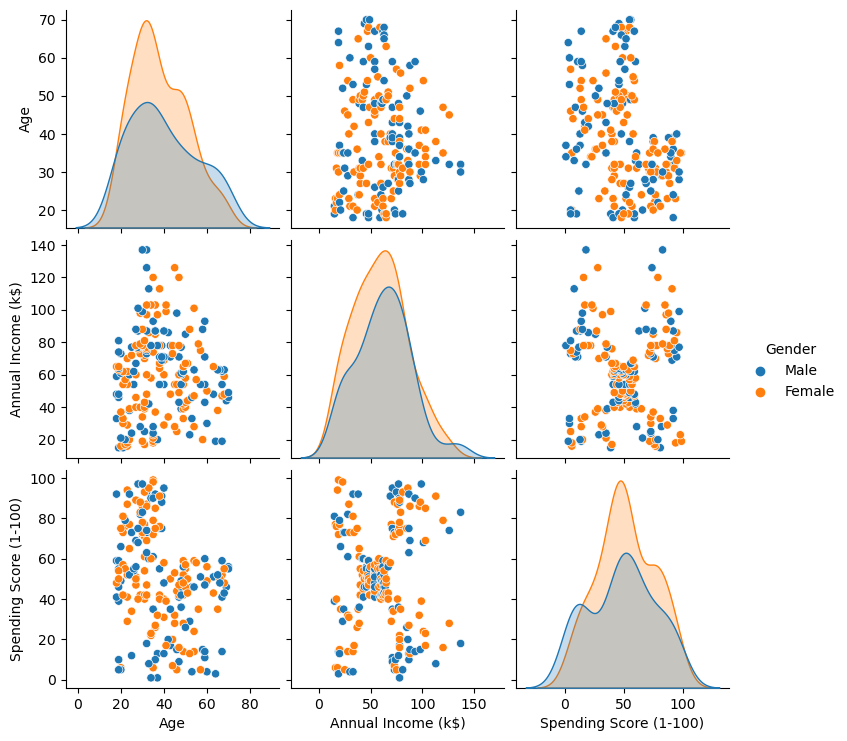

In [32]:
sns.pairplot(df,hue='Gender')

In [36]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [37]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

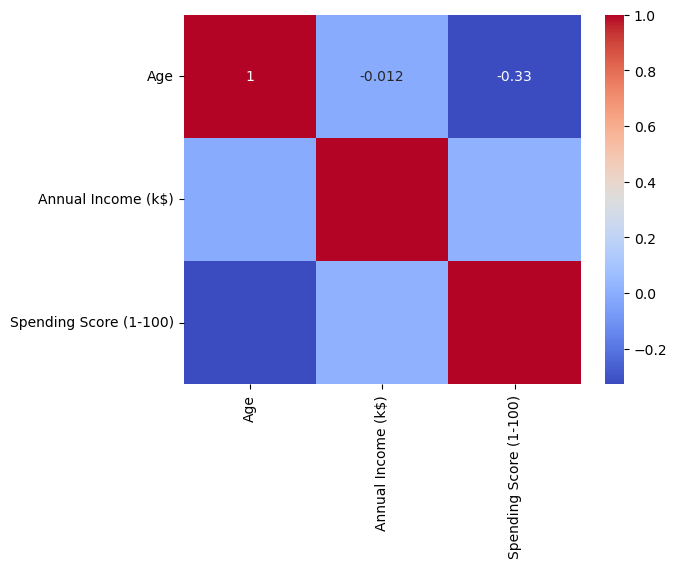

In [41]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

## Clustering - Univariate, Bivariate, Multivariate 

## Univariate Clustering

In [193]:
clustering1=KMeans(n_clusters=3)

In [194]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [195]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [196]:
df['income Cluster']=clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Clsuter,Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3,0,2
1,Male,21,15,81,0,4,7,1
2,Female,20,16,6,0,3,0,2
3,Female,23,16,77,0,4,7,1
4,Female,31,17,40,0,3,0,2


In [197]:
df['income Cluster'].value_counts()

income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [198]:
clustering1.inertia_

23517.330930930926

In [190]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [199]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3949.2756132756135,
 2865.6991129785247,
 2177.7882395382394,
 1734.1677489177487]

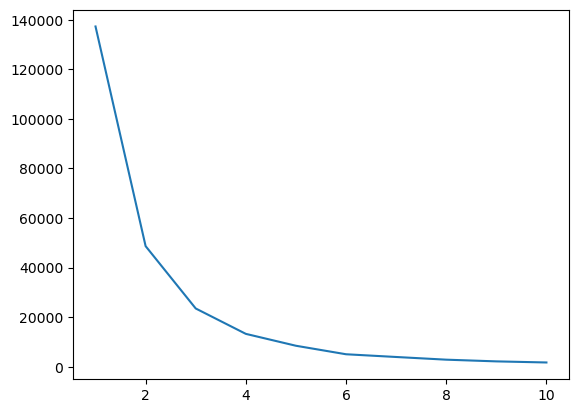

In [192]:
plt.plot(range(1,11),inertia_scores) 
#this tells us that the elbow starts at 3 so we can now have 3 clusters

In [87]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income Cluster'],
      dtype='object')

In [200]:
df.groupby('income Cluster')[ ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


## Bivariate Clustering

In [151]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Clsuter,Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3,0,2
1,Male,21,15,81,0,4,7,1
2,Female,20,16,6,0,3,0,2
3,Female,23,16,77,0,4,7,1
4,Female,31,17,40,0,3,0,2


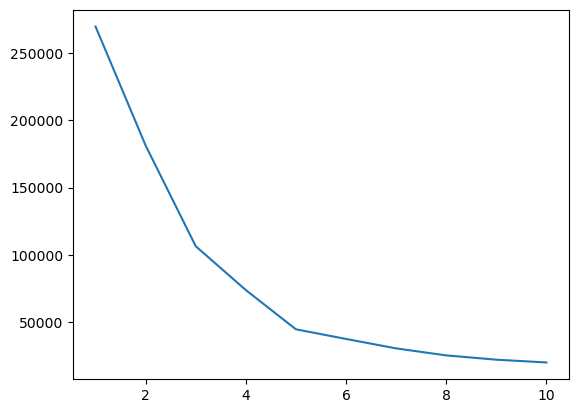

In [100]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2) 

#this makes us realise that the elbow is at 5 so we can have a cluster of 5 

In [111]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y','z']

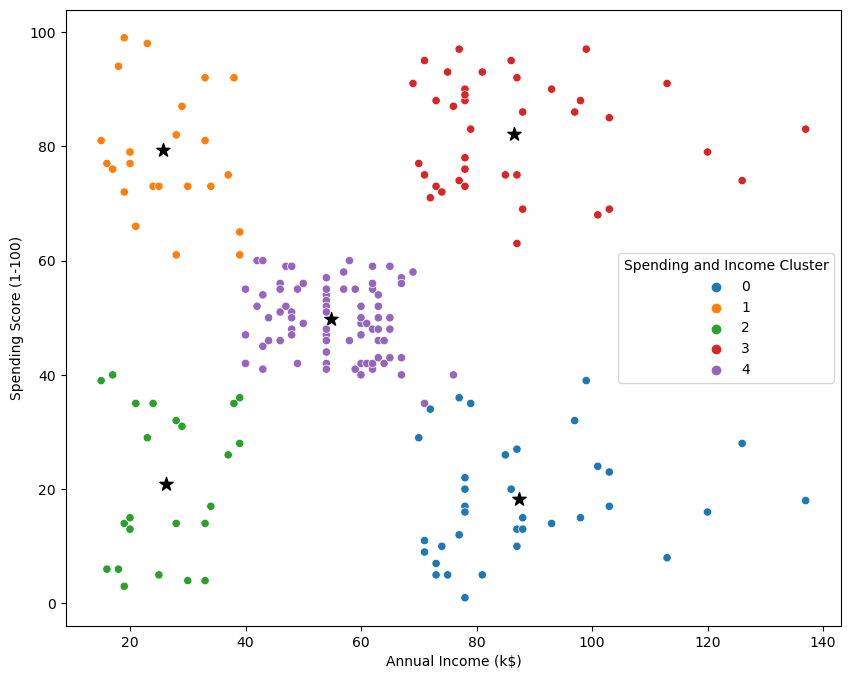

In [153]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['y'],y=centers['z'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [123]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.582278,0.417722
2,0.590909,0.409091
3,0.486486,0.513514
4,0.608696,0.391304


In [124]:
df.groupby('Spending and Income Cluster')[ ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,43.126582,54.822785,49.835443
2,25.272727,25.727273,79.363636
3,40.324324,87.432432,18.189189
4,45.217391,26.304348,20.913043


## Multivariate Clustering 

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scale=StandardScaler()

In [132]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Clsuter
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


In [140]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Clsuter,Cluster,Gender_Male
0,19,15,39,0,3,0,True
1,21,15,81,0,4,7,True
2,20,16,6,0,3,0,False
3,23,16,77,0,4,7,False
4,31,17,40,0,3,0,False


In [142]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [145]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


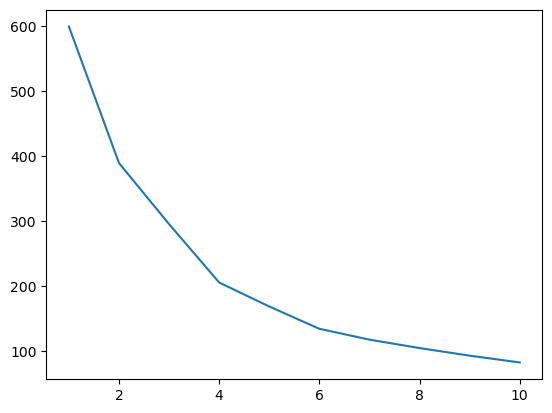

In [146]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3) 

#here we have the elbow around 4 so optimal no of clusters=4

In [166]:
# Fit K-means with optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dff)

# Add cluster labels to the original dataset
X_clustered = dff.copy()
X_clustered['Cluster'] = kmeans.labels_

# Filter data to include only the n clusters
filtered_data = X_clustered[X_clustered['Cluster'].isin(range(4))]


In [165]:
kmeans3.cluster_centers_

array([[ 1.17338538, -1.28478299, -1.44416206],
       [-1.04181311, -0.14097243, -0.0323513 ],
       [ 0.59162665, -0.19075172, -0.09268648],
       [-0.4589806 ,  1.81769762,  1.26275949],
       [-0.35604252,  1.28910885, -1.32985413],
       [-0.95652516, -1.30751869,  1.10118201],
       [ 0.8271111 ,  0.83505169, -1.26218599],
       [-0.43521371,  0.66703804,  1.23036618],
       [-0.36002956, -1.36048569, -0.90713047],
       [ 1.86593393, -0.28283547, -0.01358755]])

In [167]:
dff.value_counts()

0          1          2        
-1.496335  -1.051949   1.622741    1
 0.584899  -0.670255  -0.357158    1
 0.297832   0.398489  -0.590088    1
            0.665675  -1.288876    1
 0.369598   0.474828  -1.677091    1
                                  ..
-0.563369   0.780183   1.661563    1
-0.491602  -0.479408  -0.124229    1
           -0.021375  -0.318337    1
            0.474828   0.885132    1
 2.235532  -0.441239   0.186343    1
Name: count, Length: 200, dtype: int64

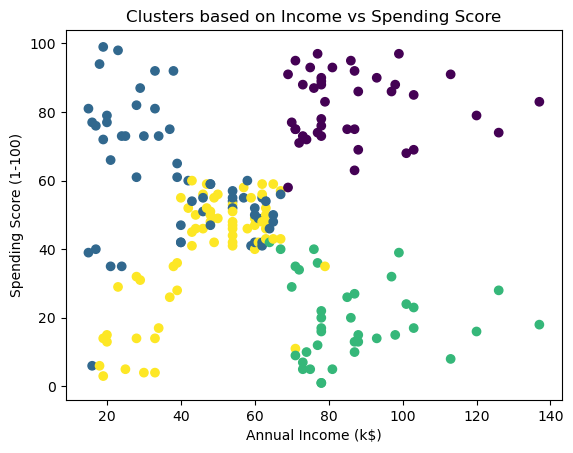

In [173]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=filtered_data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters based on Income vs Spending Score')
plt.show()

In [176]:
cluster_profiles = df.groupby('Cluster').agg({'Age': ['mean', 'std'],
                                             'Annual Income (k$)': ['mean', 'std'],
                                             'Spending Score (1-100)': ['mean', 'std']})
print(cluster_profiles)

               Age            Annual Income (k$)             \
              mean        std               mean        std   
Cluster                                                       
0        32.625000   9.085900          23.375000   7.652031   
1        46.600000   4.545555          55.800000   9.393321   
2        32.200000   3.224903         109.700000  13.768321   
3        41.160000  12.775889          79.600000   6.344289   
4        32.862069   3.925413          78.551724   6.522413   
5        51.230769   9.722430          26.230769   7.037446   
6        24.806452   5.147293          55.322581  10.097482   
7        25.272727   5.257030          25.727273   7.566731   
8        63.909091   4.859052          53.045455   7.840537   
9        41.000000   7.118052         109.700000  13.768321   

        Spending Score (1-100)             
                          mean        std  
Cluster                                    
0                    30.500000  10.862780  
1   

In [179]:
from sklearn.metrics import silhouette_score
silhouette_score(dff, kmeans.labels_)

#a silhouette score of 0.4039 suggests that the clusters are reasonably well-separated,
#indicating that the K-means clustering has provided meaningful distinctions between clusters in your data.

0.4039582785148566

In [138]:
#Displaying the details of our target cluster 
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
cluster_number = 4
cluster_details = df[df['Cluster'] == cluster_number]
cluster_details

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Clsuter,Cluster
123,Male,39,69,91,1,2,4
125,Female,31,70,77,1,2,4
127,Male,40,71,95,1,2,4
129,Male,38,71,75,1,2,4
131,Male,39,71,75,1,2,4
133,Female,31,72,71,1,2,4
135,Female,29,73,88,1,2,4
137,Male,32,73,73,1,2,4
139,Female,35,74,72,1,2,4
141,Male,32,75,93,1,2,4


## Displaying the Clustered Dataframe

In [203]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Clsuter,Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3,0,2
1,Male,21,15,81,0,4,7,1
2,Female,20,16,6,0,3,0,2
3,Female,23,16,77,0,4,7,1
4,Female,31,17,40,0,3,0,2
...,...,...,...,...,...,...,...,...
195,Female,35,120,79,1,2,2,3
196,Female,45,126,28,1,0,9,0
197,Male,32,126,74,1,2,2,3
198,Male,32,137,18,1,0,9,0


In [148]:
df.to_csv('Clustering.csv')

# Analysis 

# Cluster 1 is the target group for marketing new products since it has the intersection of high spending score and high income
# 54% of cluster 1 are women, we can increase our sales by having marketing campagins targetted to this gender demographic and look into pushing products that attract them 
# Cluster 2 presents an interesting opportunity to market items on Sale since they are an interesection of low income and spending score
# Analysing clusters based on gender for targetted marketing we can see that cluster 4 will be the ideal cluster to go after interms of maintaining revenue because it has the best spending to income ratio
